# Very Good!
# Grade 100/100

## Find the π again!
In the week3 course, we discussed how can we ﬁnd the π by just sampling random data points on a square and how to just ﬁnd the ratio of points inside a circle to total number of generate points. In this week you are going to ﬁnd the π through solving the Buﬀon’s needle problem:

Let the needle length be L and the strip width be T. 
There are two random variables that will determine this probability let’s say our random variables are θ which is the angle of the needle from the direction of strips and x which is the x-position of the needles center from the nearest line (this is the one we care each time we drop the needle). 


when L<T => the probability to cross the needle is given by the formula 

${ProbCross}=\frac{2L}{T}{\pi}$ 


therefore, the probability of not crossing and therefore, for the needle to land fully on a single shade/color.is 

${ProbNotCross}$ = 1 - $\frac{2L}{T}{\pi}$ 


 


### 1. Find the probability for the case of L > T

When the needle is long there is a little bit more complex geometry as, at certain angles, the needle will cross an edge from any position of the midpoint. 

The solution space is larger now ( *${T{\pi}}$* ) and there are more probabilities for a longer needle to cross the strip 
 
The equation below shows the probability for L>T based on the length of the needle and width of the boards.






$$PrCross = \frac{2}{\pi}{\cos^{-1}(\frac{T}{L}}) + \frac{2L}{{\pi}T}(1-\sqrt{(1-(\frac{T}{L})^{2}}))$$

If we define $  {x}=\frac{L}{T}  $ as the ratio of the lenght of the needle to the width of the board and normalize it, we get:


$$PrCross = \frac{2}{\pi}({x}-\sqrt{x^{2}-1} + {\sec^{-1}x})$$


Again, the probability of land fully within a board is the conjugate of this

${ProbNotCross} = 1 - {PrCross}$


## Numerical Simulation : 

#### 2. Find the probability using Monte Carlo simulation for l < t, for the general case and ﬁnd the value of the π using some special case (e.g. l = 2, and t = 3)



First, we are going to do the general case


For the general case, we are going to :

First calculate the probability of crossing vs. not crossing using the formula above for L<T $  {\pi}=\frac{2l}{Pt}  $ and generate random variables for l ( length of the needle ) and t ( distance between strips ) 

 

In [1]:
import random
import math 

T = random.randint(1,20)
L = random.randint(0,T-1) # to comply with L<T


crossing =(2*L)/(T*math.pi)
not_crossing=1-((2*L)/(T*math.pi))

print("distance board= ", T)
print("length needle= ",L)
print("P(crossing l<t)=", crossing)
print("P(not crossing l<t)=",not_crossing)

distance board=  17
length needle=  13
P(crossing l<t)= 0.48682688475167984
P(not crossing l<t)= 0.5131731152483201


Using Montecarlo simulation , create a function *pi_estimate* that will take the lenght of the needle and distance. 
This function will generate 1 angle for each needle and will clasiffy the needle in 2 buckets  
   * Crossing
   * Not crossing 


Then the function will count the # of needles crossing and will estimate PI based on the total number of needles that      crossed  

In [2]:
import random
import math 

def pi_estimate(r,n,T,L):
    data = []  
    for sim in range(r): #number of times we run the sim
        cross = 0
        for i in range(n):#number of needles we throw
            center = random.uniform(0, T / 2.0) 
            theta = random.uniform(0, math.pi / 2)
            criteria = center - (L / 2.0) * math.cos(theta)  
            if criteria < 0: # if the difference of distance is < than 0 then is crossing the strip
                cross+= 1
        pi = (2.0 * L * n)/(T * cross)
        prob_cross=cross/n
        data.append([sim,cross,prob_cross,pi])
    return data




In [3]:
r = 10   # number of times we run the simulation
n = 4000 # number of needles thrown each time 

print("Width of the board : ",T)
print("Lenght of the needle : ", L)
print ('[Runs],[Cross],[Prob_cross] ,[pi]')


pi_estimate(r,n,T,L)

Width of the board :  17
Lenght of the needle :  13
[Runs],[Cross],[Prob_cross] ,[pi]


[[0, 1943, 0.48575, 3.1485574157609517],
 [1, 1974, 0.4935, 3.09911198521962],
 [2, 1919, 0.47975, 3.1879348925604636],
 [3, 1918, 0.4795, 3.189597006685886],
 [4, 1905, 0.47625, 3.211363285471669],
 [5, 1846, 0.4615, 3.3140016570008286],
 [6, 1920, 0.48, 3.1862745098039214],
 [7, 1927, 0.48175, 3.1747000824200984],
 [8, 1954, 0.4885, 3.130832681076525],
 [9, 1978, 0.4945, 3.0928448224588116]]

Now, we are gonig to run the simulation for special case like l=2 and t=3 

In [4]:
print ('[Runs] [Crossing] [pi] for l=2 and t=3')
pi_estimate(r,n,3,2)

[Runs] [Crossing] [pi] for l=2 and t=3


[[0, 1762, 0.4405, 3.026863412788498],
 [1, 1659, 0.41475, 3.2147880249146072],
 [2, 1646, 0.4115, 3.240178209801539],
 [3, 1667, 0.41675, 3.1993601279744053],
 [4, 1722, 0.4305, 3.097173828881146],
 [5, 1704, 0.426, 3.1298904538341157],
 [6, 1731, 0.43275, 3.0810706720585403],
 [7, 1724, 0.431, 3.0935808197989174],
 [8, 1721, 0.43025, 3.0989734650397054],
 [9, 1643, 0.41075, 3.2460945425035503]]


==============================================================================

#### 3. Find the probability using Monte Carlo simulation (L > T) for the general case. 
#### From the probability formula we found for L < T, the probability is linear with L/T.


Lets apply the formula of the probability first and then, we will build the Montecarlo simulation to review the results for several runs. 



If we define $  {x}=\frac{L}{T}  $ as the ratio of the lenght of the needle to the width of the board and normalize it, we get:


$$Pr = \frac{2}{\pi}({x}-\sqrt{x^{2}-1} + {\sec^{-1}x})$$



In [5]:
import random
import math 
import mpmath
import numpy as np

## If T<L

TT = random.randint(1,20)
LL = random.randint(TT+1,40) 

print("Width of the board : ",TT)
print("Lenght of the needle : ",LL)


x=LL/TT

crossing =(2/math.pi)*(x-np.sqrt(x**2 -1)+mpmath.asec(x))
not_crossing =1-crossing

print("P(crossing l> t)=", crossing)
print("P(not crossing l> t)=",not_crossing) 


Width of the board :  1
Lenght of the needle :  13
P(crossing l> t)= 0.975502528993647
P(not crossing l> t)= 0.0244974710063534


=============================================================================



Now, we are gonig to write a Montecarlo simulation for long needle. 
When the needle is longer, the probability of crossing the lines will be higher

Let ${\theta}$ denote the angle between the needle and this parallel line, 
and lets again denote x as the distance of the midpoint of the needle from the 
nearest parallel line

Then is easy to see that :

If ${0}\leq{x}\leq\frac{d}{2}$ and ${0}\leq{\theta}\leq{\pi}$ and 

when we throw a needle  ${(x,\theta)}$ with these characteristics, the needle is going to cross the board. 


I am going to create some random variables the angle/center of the needle again and build the function to give me the number of crossing assuming those conditions. 


In [6]:
def prob_cross_long(r,n,TT,LL):
    data_long = []  
    for sim in range(r): #number of times we run the sim
        cross = 0
        for i in range(n):#number of needles we throw
            center = random.uniform(0, TT / 2.0) 
            theta = random.uniform(0, math.pi) 
            criteria = center -(LL/2) * math.sin(theta) 
            if criteria <=0:  # if the difference of distance is > than 1 then is crossing the strip
                cross+= 1
        data_long.append([sim,cross,cross/n])
    return data_long
print("wide of the board ", TT)
print("lenght of the needle ", LL)
print ('[Runs] [Crossing] [Prob]')
prob_cross_long(r,n,TT,LL)

wide of the board  1
lenght of the needle  13
[Runs] [Crossing] [Prob]


[[0, 3907, 0.97675],
 [1, 3909, 0.97725],
 [2, 3905, 0.97625],
 [3, 3905, 0.97625],
 [4, 3896, 0.974],
 [5, 3924, 0.981],
 [6, 3891, 0.97275],
 [7, 3894, 0.9735],
 [8, 3918, 0.9795],
 [9, 3908, 0.977]]

As we can see, the prob of crossing is similar to what we generate using the equation. 

#### 4. After writing your general code in Part 3 plot the Probability vs l/t ratio. *Hint: You need to run the simulations for diﬀerent values of (l/t)*


In [7]:
import matplotlib.pyplot as plt
import mpmath
import math

# Abtin:
You should use plt.scatter since you are using a for loop for every point

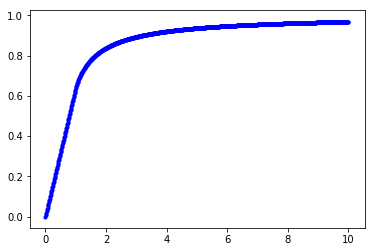

In [13]:
xx = np.linspace(0, 10, 1000) #xx=l/t ( which is >1 )
for i in xx:
    if i<=1:
        crossing=(2*i/math.pi)
    if i>1 :
        crossing =(2/math.pi)*(i-np.sqrt(i**2 -1)+mpmath.asec(i))
    plt.scatter(i,crossing, marker=".", c="b")
plt.show()

### Note for Abtin.

The chart above should look like this  - I couldnt figure out the code in Python but please find below some interpretation of the results. 

![PlotProbabilityNeedle](./markdowns_week3/PlotProbabilityNeedle.png) 




1. When the needle is shorter than the distance between boards, the probability linearly changes with the ratio of the length. 
2. When the needle is long, the probability asymptotes to near certainty as the the needle gets infintely longer compared to the width of the board.

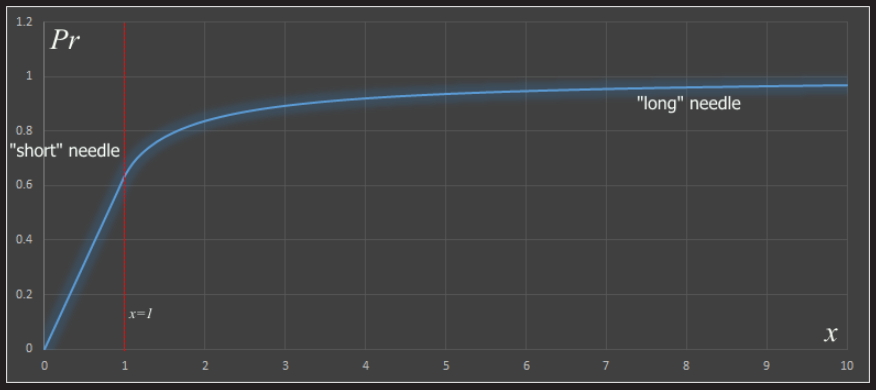